In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-data/mnist.npz


In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

2024-02-23 22:55:03.413935: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 22:55:03.414015: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 22:55:03.415815: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

# There was some error in loading data from keras.datasets.mnist 
# so importing data directly by uploading it in the datasets
data = np.load('/kaggle/input/mnist-data/mnist.npz')
data

NpzFile '/kaggle/input/mnist-data/mnist.npz' with keys: x_test, x_train, y_train, y_test

In [5]:
# (x_train, y_train),(x_test, y_test) = data.load_data()
for files in data:
    print(files,data[files].shape)

x_test (10000, 28, 28)
x_train (60000, 28, 28)
y_train (60000,)
y_test (10000,)


In [6]:
# X_train, X_test, y_train, y_test = data[x_train],data[x_test],data[y_train],data[y_test]
data_list=[]
for files in data:
    data_list.append(data[files])
X_test,X_train,y_train,y_test = data_list[0],data_list[1],data_list[2],data_list[3]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [7]:
X_train[2].shape

(28, 28)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

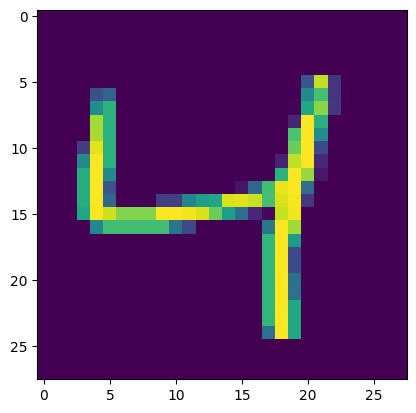

In [9]:
# plot these digits using matplotlib
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [10]:
# standradise the values b/w 0 and 1 by dividing each number by 255
X_train = X_train/255
X_test = X_test/255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
# Initialise and Train the model
model = Sequential()
model.add(Flatten(input_shape=(28,28))) # flattens the 28X28 into single row with 784 values
model.add(Dense(128,activation='relu'))
# model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2863 - accuracy: 0.9193 - val_loss: 0.1511 - val_accuracy: 0.9567
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1275 - accuracy: 0.9627 - val_loss: 0.1162 - val_accuracy: 0.9650
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0873 - accuracy: 0.9742 - val_loss: 0.0969 - val_accuracy: 0.9717
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0635 - accuracy: 0.9819 - val_loss: 0.0973 - val_accuracy: 0.9708
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0486 - accuracy: 0.9860 - val_loss: 0.0873 - val_accuracy: 0.9747
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0380 - accuracy: 0.9888 - val_loss: 0.0857 - val_accuracy: 0.9754
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0303 - accuracy: 0.9911 - val_loss: 0.0882 - val_accuracy:

In [15]:
y_prob = model.predict(X_test) 
y_prob

313/313 [==============================] - 1s 2ms/step


array([[1.9034595e-11, 4.8705286e-11, 3.6457902e-08, ..., 9.9997896e-01,
        4.9067095e-10, 2.1879948e-06],
       [1.7745970e-12, 5.4257898e-06, 9.9999386e-01, ..., 4.3342885e-16,
        4.5754979e-07, 7.6100193e-16],
       [4.5947473e-07, 9.9290490e-01, 4.0591048e-04, ..., 5.3866766e-04,
        6.1061168e-03, 1.6583098e-06],
       ...,
       [1.9842725e-18, 2.1167868e-12, 2.3956867e-14, ..., 7.1842699e-08,
        3.6712522e-10, 6.6934558e-06],
       [4.6972429e-16, 3.2396545e-15, 1.0620392e-14, ..., 6.6777047e-13,
        1.6777525e-06, 1.9093829e-15],
       [1.4464166e-11, 9.1290921e-14, 6.8967865e-10, ..., 6.0277122e-15,
        1.0890333e-12, 2.0202297e-14]], dtype=float32)

In [16]:
y_pred = y_prob.argmax(axis=1) # Each number has a probability, find the number with max probability
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [17]:
# Check accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9751

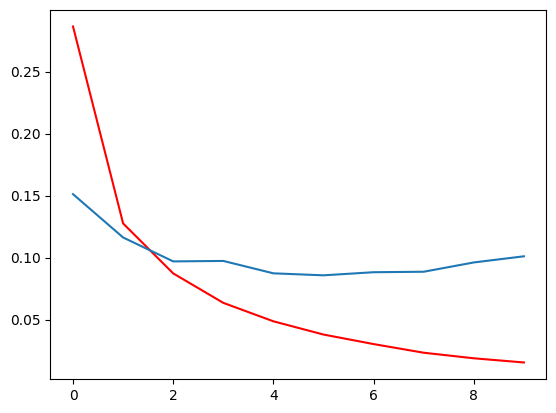

In [18]:
# plot the loss curve and accuracy curve to check overfitting
plt.plot(history.history['loss'],color = 'red')
plt.plot(history.history['val_loss'])

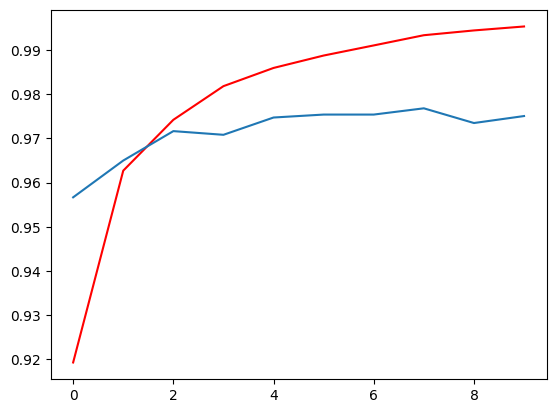

In [19]:
# plot the loss curve and accuracy curve to check overfitting
plt.plot(history.history['accuracy'],color = 'red')
plt.plot(history.history['val_accuracy'])

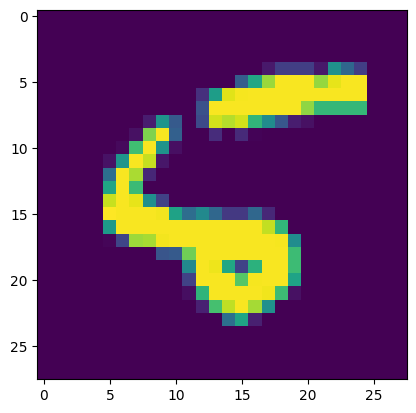

In [20]:
# Check the validation numbers with actual numbers
plt.imshow(X_test[8])

In [21]:
# X_test[2].reshape(1,28,28)
model.predict(X_test[8].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 26ms/step


array([5])

In [22]:
y_test[8]

5

In [23]:
import pickle
pickle.dump(model, open('MNIST_digit_classification_model_using_ann.pkl', 'wb'))